In [8]:
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl,plt
from pandas_datareader import data as datawb
plt.style.use('seaborn')
mpl.rcParams['font.family']='serif'
%matplotlib inline

In [9]:
raw=pd.read_csv("tr_eikon_eod_data.csv",index_col=0,parse_dates=True)

In [10]:
raw.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


In [11]:
symbol='AAPL.O'
data=pd.DataFrame(raw[symbol]).dropna()

In [12]:
data

,AAPL.O
Date,
2010-01-04,30.572827
2010-01-05,30.625684
2010-01-06,30.138541
2010-01-07,30.082827
2010-01-08,30.282827
2010-01-11,30.015684
2010-01-12,29.674256
2010-01-13,30.092827
2010-01-14,29.918542


In [13]:
#An alternative way
ticker='AAPL'
start_date='2010-01-04'
end_date='2018-06-29'
stock_data=datawb.DataReader(ticker,'yahoo',start_date,end_date)
stock_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.681330
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.727465
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.302330
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.253704
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.428249


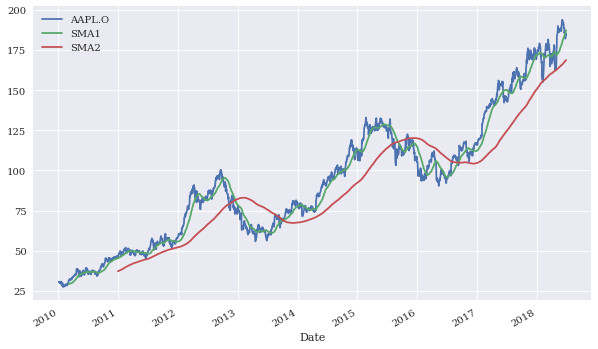

In [14]:
sma1=42
sma2=252
data['SMA1']=data[symbol].rolling(sma1).mean()
data['SMA2']=data[symbol].rolling(sma2).mean()
data.plot(figsize=(10,6))

In [15]:
data.dropna(inplace=True)

In [16]:
data['position']=np.where(data['SMA1']>data['SMA2'],1,-1)

In [17]:
data.tail()

,AAPL.O,SMA1,SMA2,position
Date,,,,
2018-06-25,182.17,185.606190,168.265556,1
2018-06-26,184.43,186.087381,168.418770,1
2018-06-27,184.16,186.607381,168.579206,1
2018-06-28,185.50,187.089286,168.736627,1
2018-06-29,185.11,187.470476,168.901032,1


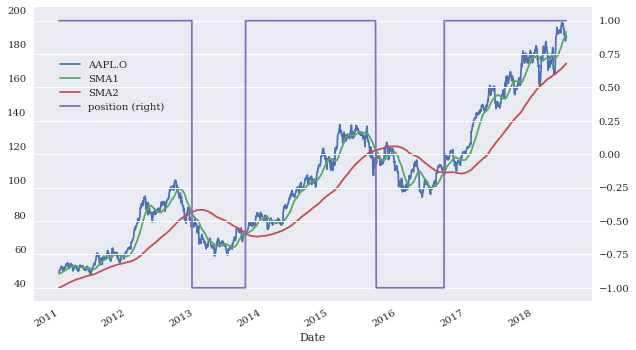

In [18]:
ax=data.plot(secondary_y='position',figsize=(10,6))
ax.get_legend().set_bbox_to_anchor((0.25,0.85))

In [19]:
data['returns']=np.log(data[symbol]/data[symbol].shift(1))

In [20]:
data['strat']=data['position'].shift(1)*data['returns']


In [21]:
data.dropna(inplace=True)

In [22]:
data.head()

,AAPL.O,SMA1,SMA2,position,returns,strat
Date,,,,,,
2011-01-03,47.081381,45.349708,37.186246,1,0.021500,0.021500
2011-01-04,47.327096,45.412599,37.252521,1,0.005205,0.005205
2011-01-05,47.714238,45.466102,37.322266,1,0.008147,0.008147
2011-01-06,47.675667,45.522565,37.392079,1,-0.000809,-0.000809
2011-01-07,48.017095,45.582089,37.462453,1,0.007136,0.007136


In [23]:
np.exp(data[['returns','strat']].sum())

returns    4.017148
strat      5.811299
dtype: float64

In [24]:
data[['returns','strat']].std()*252**0.5

returns    0.250571
strat      0.250407
dtype: float64

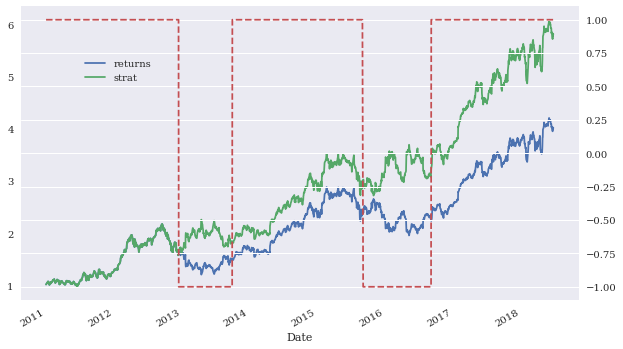

In [25]:
ax=data[['returns','strat']].cumsum().apply(np.exp).plot(figsize=(10,6))
data['position'].plot(ax=ax,secondary_y='position',style='--')
ax.get_legend().set_bbox_to_anchor((0.25,0.85))

In [26]:
from itertools import product
sma1=range(20,61,4)
sma2=range(180,281,10)
results=pd.DataFrame()
for SMA1,SMA2 in product(sma1,sma2):
    data=pd.DataFrame(raw[symbol])
    data.dropna(inplace=True)
    data['returns']=np.log(data[symbol]/data[symbol].shift(1))
    data['SMA1']=data[symbol].rolling(SMA1).mean()
    data['SMA2']=data[symbol].rolling(SMA2).mean()
    data.dropna(inplace=True)
    data['position']=np.where(data['SMA1']>data['SMA2'],1,-1)
    data['strat']=data['position'].shift(1)*data['returns']
    data.dropna(inplace=True)
    pref=np.exp(data[['returns','strat']].sum())
    results=results.append(pd.DataFrame(
                {'SMA1':SMA1,'SMA2':SMA2,'MKT':pref['returns'],
                'strat':pref['strat'],
                'OUT':pref['strat']-pref['returns']},index=[0]),ignore_index=True)

In [27]:
results.sort_values('OUT',ascending=False).head()

,SMA1,SMA2,MKT,strat,OUT
56,40,190,4.650342,7.175173,2.524831
39,32,240,4.045619,6.558690,2.513071
59,40,220,4.220272,6.544266,2.323994
46,36,200,4.074753,6.389627,2.314874
55,40,180,4.574979,6.857989,2.283010


In [28]:
import math
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm

In [29]:
def print_stat(array):
    sta=scs.describe(array)
    print('%14s %15s'%('statistics','value'))
    print(30*'-')
    print('%14s %15.5f'%('size',round(sta[0])))
    print('%14s %15.5f'%('min',sta[1][0]))
    print('%14s %15.5f'%('max',sta[1][1]))
    print('%14s %15.5f'%('mean',sta[2]))
    print('%14s %15.5f'%('std',np.sqrt(sta[3])))
    print('%14s %15.5f'%('skew',sta[4]))
    print('%14s %15.5f'%('kurtosis',sta[5]))

In [31]:
print_stat(data.strat.values)

    statistics           value
------------------------------
          size      1858.00000
           min        -0.08330
           max         0.13187
          mean         0.00066
           std         0.01582
          skew         0.38438
      kurtosis         5.15146


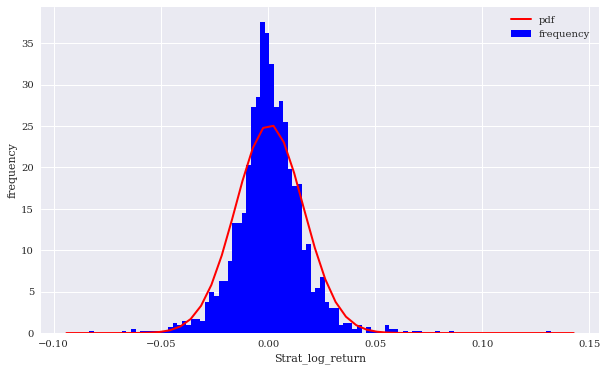

In [42]:
plt.figure(figsize=(10,6))
plt.hist(data.strat.values,bins=100,density=True,label='frequency',color='b')
plt.xlabel('Strat_log_return')
plt.ylabel('frequency')
x=np.linspace(plt.axis()[0],plt.axis()[1])
plt.plot(x,scs.norm.pdf(x,data.strat.mean(),data.strat.std()),
        'r',lw=2.0,label='pdf')
plt.legend()

Text(0, 0.5, 'sample quantiles')

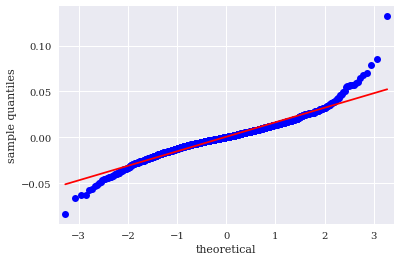

In [35]:
sm.qqplot(data.strat.values,line='s')
plt.xlabel('theoretical')
plt.ylabel('sample quantiles')

In [36]:
def normal_test(arr):
    print('Skew of dataset    %14.3f' % scs.skew(arr))
    print('Skew test Pvalue   %14.3f' % scs.skewtest(arr)[1])
    print('Kurt of dataset    %14.3f' % scs.kurtosis(arr))
    print('Kurt test Pvalue   %14.3f' % scs.kurtosistest(arr)[1])
    print('Normal test Pvalue %14.3f' % scs.normaltest(arr)[1])
    
    

In [37]:
normal_test(data.strat.values)

Skew of dataset             0.384
Skew test Pvalue            0.000
Kurt of dataset             5.151
Kurt test Pvalue            0.000
Normal test Pvalue          0.000


In [55]:
np.quantile(data.strat.values,0.01)

-0.0420593102509018

In [56]:
np.quantile(data.strat.mean()+data.strat.std()*np.random.standard_normal(10000),0.01)

-0.03529155206844548